# ¡Hola Sarah! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Sarah, iniciaste muy bien el proyecto con un análisis preliminar claro y ordenado de los datos, utilizando correctamente funciones clave que te permitieron entender la estructura del dataset y hacer ajustes pertinentes. 

Sin embargo, es importante que ajustes el redondeo en los cálculos de duración de llamadas y consumo de internet según lo que se plantea en el enunciado, ya que esto afecta directamente la estimación de los cobros mensuales por usuario. 

También es fundamental que completes todas las secciones del proyecto para que tu análisis esté completo y sea coherente con los objetivos planteados. Como apoyo, podrías considerar visualizar mejor las comparaciones entre planes usando histogramas superpuestos. 

Estás en buen camino, no te desanimes, solo necesitas hacer algunos ajustes clave para fortalecer tu análisis.

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡S excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

¿Cuáles son mis objetivos en este proyecto de Sprint 5?
<br>
Mis objetivos son analizar el comportamiento de los 500 clientes de Megaline y averiguar cuál es la tarifa de prepago que genera más ingresos

## Inicialización

In [172]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar datos

In [173]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [174]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [175]:
# Imprime una muestra de los datos para las tarifas
plans.head()
#considero que la información esta limpia, lista para analizar.

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No encuentro ningun valor vacío o duplicado. Esta limpia la tabla de errores. Incluso los tipos de datos son acordes. Voy a crear una nueva columna llamada 'gb_per_month_included', para que se pueda comparar con la otra columna 'usd_per_gb'.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [176]:
num_divisor= 1024
plans['usd_per_mb'] = plans['usd_per_gb'] / num_divisor
print(plans['usd_per_mb'])

0    0.009766
1    0.006836
Name: usd_per_mb, dtype: float64


## Usuarios/as

In [177]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [178]:
# Imprime una muestra de datos para usuarios
users.head()
#churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, 
#la tarifa se estaba usando cuando fue extraída esta base de datos).

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Encuentro algunos problemas, el primero es que en la columna churn_date solo hay 34 valores, tengo que rellenar los valores faltantes con fillna('tarifa_en_uso'), también tengo que cambiar el tipo de datos de las columna reg_date y churn_date, con pd.to_datetime(format=" "). No hay usuarios duplicados. lo revisé con users['user_id'].duplicated().sum()

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [179]:
#Sustituir valores faltantes
#users['churn_date'].isna().sum()
#users['churn_date'].fillna('tarifa_en_uso', inplace= True)
#users['churn_date'].isna().sum()

#Cambiar tipo de datos
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Tengo una pregunta, cual es el paso correcto, rellenar los valores faltantos con un object, y no poder cambiar la columna a tipo datetime64, o dejar los valores NaN y sí cambiar el tipo de datos de la columna

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [180]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [181]:
# Imprime una muestra de datos para las llamadas
calls.head()
#calls['id'].duplicated().sum()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En esta tabla encuentro los datos únicos por llamada de cada usuario. No veo tipo de datos inadecuados, ausentes, o duplicados. Solo tengo que convertirme la columna 'call_date' a datetime64 type.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [182]:
formato_fecha = "%Y-%m-%d"
calls['call_date']= pd.to_datetime(calls['call_date'], format=formato_fecha)
print(calls['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [183]:
#Mas adelante necesito los meses de las llamadas
calls['months']= calls['call_date'].dt.month
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   months     137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


## Mensajes

In [184]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [185]:
# Imprime una muestra de datos para los mensajes
messages.head(20)
#messages['id'].duplicated().sum()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


En esta tabla veo la información de los mensajes, el id de mensaje, el usuario del mensaje y su fecha. Todo se encuentra bien, solo hay que modificar el tipo de datos de 'message_date'.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [186]:
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#messages.info()

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [187]:
#Mas adelante ocupo una columna donde almacene los mensajes por meses del año
messages['months']= messages['message_date'].dt.month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   months        76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [188]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [189]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)
#internet['id'].duplicated().sum()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Internet, muestra los detalles por cada sesion web que hace el usuario. Todo bien, no duplicados, no ausentes, solo falta cambiar el tipo de datos de las fechas.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [190]:
internet['session_date']=pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
#internet.info()

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [191]:
internet['months']= internet['session_date'].dt.month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   months        104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [192]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb
0,50,15360,500,20,10,0.03,0.03,surf,0.009766
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [193]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#PUEDE DECIRME CUÁL ES LA FORMA CORRECTA, SI USAR PIVOT TABLE O GROUPBY
#usando groupby devuelve un objeto series
#dt_months= calls['call_date'].dt.month
grp= calls.groupby(['user_id', 'months'])
print(grp['id'].count())

#cree un pivot table, esto devuelve un DF
pivot_call= calls.pivot_table(index=['user_id','months'],
                        #columns= 'calls_months',
                        values='id',
                        aggfunc='count')
pivot_call

user_id  months
1000     12        16
1001     8         27
         9         49
         10        65
         11        64
                   ..
1498     12        39
1499     9         41
         10        53
         11        45
         12        65
Name: id, Length: 2258, dtype: int64


id
user_id months    
1000    12      16
1001    8       27
        9       49
        10      65
        11      64
...             ..
1498    12      39
1499    9       41
        10      53
        11      45
        12      65

[2258 rows x 1 columns]

In [194]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls['duration']= np.ceil(calls['duration'])
calls.head()
pivot_min= calls.pivot_table(index=['user_id','months'],
                        #columns= 'calls_months',
                        values='duration',
                        aggfunc='sum')
pivot_min

duration
user_id months          
1000    12         124.0
1001    8          182.0
        9          315.0
        10         393.0
        11         426.0
...                  ...
1498    12         339.0
1499    9          346.0
        10         385.0
        11         308.0
        12         496.0

[2258 rows x 1 columns]

In [195]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
pivot_sms= messages.pivot_table(index=['user_id','months'],
                        #columns= 'sms_months',
                        values='id',
                        aggfunc='count')
pivot_sms


id
user_id months    
1000    12      11
1001    8       30
        9       44
        10      53
        11      36
...             ..
1496    9       21
        10      18
        11      13
        12      11
1497    12      50

[1806 rows x 1 columns]

In [196]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

pivot_vol_trafic= internet.pivot_table(index=['user_id','months'],
                        values='mb_used',
                        aggfunc='sum')

pivot_vol_trafic['mb_used'] = pivot_vol_trafic['mb_used'] /1024
pivot_vol_trafic['mb_used'] = np.ceil(pivot_vol_trafic['mb_used'] )

pivot_vol_trafic

mb_used
user_id months         
1000    12          2.0
1001    8           7.0
        9          14.0
        10         22.0
        11         19.0
...                 ...
1498    12         23.0
1499    9          13.0
        10         20.0
        11         17.0
        12         22.0

[2277 rows x 1 columns]

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [197]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Intenté fusionar mis pivot_tables
df_fusion= pd.concat([pivot_call, pivot_min, pivot_sms, pivot_vol_trafic], axis='columns')
df_fusion.columns=['num_call', 'sum_min', 'num_sms', 'vol_num']
df_fusion

num_call  sum_min  num_sms  vol_num
user_id months                                     
1000    12          16.0    124.0     11.0      2.0
1001    8           27.0    182.0     30.0      7.0
        9           49.0    315.0     44.0     14.0
        10          65.0    393.0     53.0     22.0
        11          64.0    426.0     36.0     19.0
...                  ...      ...      ...      ...
1498    12          39.0    339.0      NaN     23.0
1499    9           41.0    346.0      NaN     13.0
        10          53.0    385.0      NaN     20.0
        11          45.0    308.0      NaN     17.0
        12          65.0    496.0      NaN     22.0

[2293 rows x 4 columns]

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

In [198]:
#ahora los índices son 0-2292, y user_id y month number son columnas
#PREGUNTA, ¿de esta forma sigue estando bien agrupado por user_id?
df_fusion= df_fusion.reset_index()
#df_fusion

In [199]:
# Añade la información de la tarifa
#Hacer merge 2 veces, primero con la tabla users, y luego con la tabla plans.
df_plan= df_fusion.merge(users[['user_id', 'plan']], on='user_id')
df_plan.rename(columns={'plan':'plan_name'}, inplace=True)

In [200]:
df_plan= df_plan.merge(plans, on='plan_name')
df_plan
#[['plan_name', 'usd_monthly_pay']]

,user_id,months,num_call,sum_min,num_sms,vol_num,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_per_mb
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.006836
1,1006,11,2.0,10.0,15.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.006836
2,1006,12,9.0,59.0,139.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.006836
3,1008,10,71.0,476.0,21.0,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.006836
4,1008,11,63.0,446.0,37.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.006836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23.0,surf,50,15360,500,20,10,0.03,0.03,0.009766
2289,1499,9,41.0,346.0,NaN,13.0,surf,50,15360,500,20,10,0.03,0.03,0.009766
2290,1499,10,53.0,385.0,NaN,20.0,surf,50,15360,500,20,10,0.03,0.03,0.009766
2291,1499,11,45.0,308.0,NaN,17.0,surf,50,15360,500,20,10,0.03,0.03,0.009766


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [201]:
# Calcula el ingreso mensual para cada usuario
#1:Obtener el uso excedente de llamadas, msjs y datos
df_plan['rest_min']= df_plan['sum_min'] - df_plan['minutes_included']
df_plan['rest_sms']= df_plan['num_sms'] - df_plan['messages_included']
df_plan['rest_datos']= df_plan['vol_num'] - (df_plan['mb_per_month_included'] / 1024)

#2:Si el resultado de la resta es positivo, significa que el usuario se excedió.
#Si el resultado de la resta es cero o negativo, significa que el usuario no superó su lím. por lo tanto, no se le cobrará extra por ese servicio.
#.clip(lower=0). Le dice a pd "en esta columna, cualquier valor que sea menor que 0, debe ser reemplazado por 0"
df_plan['rest_min']=df_plan['rest_min'].clip(lower=0)
df_plan['rest_sms']=df_plan['rest_sms'].clip(lower=0)
df_plan['rest_datos']=df_plan['rest_datos'].clip(lower=0)
#2.1: rest_sms, convertir NaN a 0
df_plan['rest_sms'].fillna(0, inplace=True)
#3:multiplicar el extra por su tarifa correspondiente
df_plan['usd_extra_min']= df_plan['rest_min'] * df_plan['usd_per_minute'] 
df_plan['usd_extra_sms']= df_plan['rest_sms'] * df_plan['usd_per_message'] 
df_plan['usd_extra_data']= df_plan['rest_datos'] * (df_plan['usd_per_mb'] * 1024)
#4:Sumar los costos extras más su pago mensual en dólares
df_plan['costo_adicional'] = df_plan['usd_extra_min']+ df_plan['usd_extra_sms'] + df_plan['usd_extra_data']
df_plan['ing_mensual'] = df_plan['costo_adicional'] + df_plan['usd_monthly_pay']
df_plan

,user_id,months,num_call,sum_min,num_sms,vol_num,plan_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,usd_per_mb,rest_min,rest_sms,rest_datos,usd_extra_min,usd_extra_sms,usd_extra_data,costo_adicional,ing_mensual
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1,1006,11,2.0,10.0,15.0,3.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,1006,12,9.0,59.0,139.0,32.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,2.0,0.0,0.0,14.0,14.0,84.0
3,1008,10,71.0,476.0,21.0,17.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,1008,11,63.0,446.0,37.0,24.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23.0,surf,50,15360,500,...,0.03,0.009766,0.0,0.0,8.0,0.0,0.0,80.0,80.0,100.0
2289,1499,9,41.0,346.0,NaN,13.0,surf,50,15360,500,...,0.03,0.009766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2290,1499,10,53.0,385.0,NaN,20.0,surf,50,15360,500,...,0.03,0.009766,0.0,0.0,5.0,0.0,0.0,50.0,50.0,70.0
2291,1499,11,45.0,308.0,NaN,17.0,surf,50,15360,500,...,0.03,0.009766,0.0,0.0,2.0,0.0,0.0,20.0,20.0,40.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Sarah, has calculado correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda completar todas las secciones propuestas para este proyecto.


Como recomendación cuando realizas una comparación entre conjuntos de datos (en este caso los dos planes), puedes usar histogramas los cuales puedes superponer, de esta forma la comparación es más directa.

La idea es que se vea algo así:

<img src="https://datavizpyr.com/wp-content/uploads/2020/03/overlapping_histograms_with_matplotlib_Python.png" width="400">

Acá te comparto un enlace donde lo explican [Histogramas](https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/)
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    Muchas gracias por sus comentarios, espero que en esta revisión mi proyecto sea aprobado, bonito día.
</div>

### Llamadas

In [202]:
df_plan.columns

Index(['user_id', 'months', 'num_call', 'sum_min', 'num_sms', 'vol_num',
       'plan_name', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'usd_per_mb', 'rest_min', 'rest_sms', 'rest_datos',
       'usd_extra_min', 'usd_extra_sms', 'usd_extra_data', 'costo_adicional',
       'ing_mensual'],
      dtype='object')

In [203]:
df_plan.head()

,user_id,months,num_call,sum_min,num_sms,vol_num,plan_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,usd_per_mb,rest_min,rest_sms,rest_datos,usd_extra_min,usd_extra_sms,usd_extra_data,costo_adicional,ing_mensual
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1,1006,11,2.0,10.0,15.0,3.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,1006,12,9.0,59.0,139.0,32.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,2.0,0.0,0.0,14.0,14.0,84.0
3,1008,10,71.0,476.0,21.0,17.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,1008,11,63.0,446.0,37.0,24.0,ultimate,1000,30720,3000,...,0.01,0.006836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0


plan_name        surf    ultimate
months                           
1          203.000000  193.500000
2          297.000000  470.333333
3          330.000000  304.250000
4          351.540000  336.857143
5          410.240000  406.241379
6          435.791667  387.444444
7          453.733333  427.067797
8          417.849057  421.436620
9          420.732984  437.511628
10         438.991379  455.028571
11         432.494585  448.730159
12         484.501608  465.261745


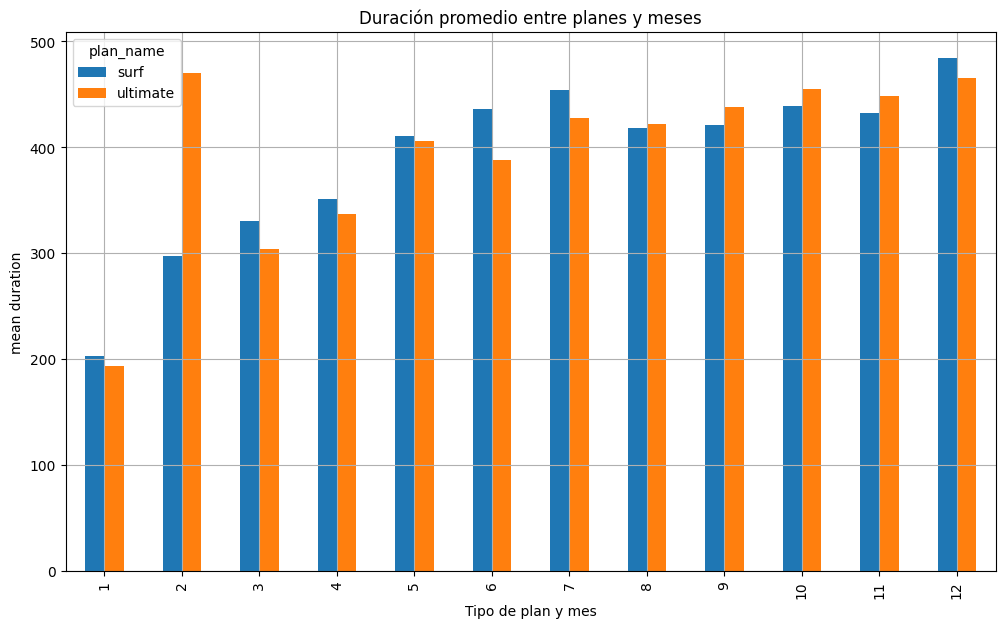

In [204]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_min = df_plan.groupby(['months','plan_name'])['sum_min'].mean().unstack()

mean_min.plot(kind='bar', title='Duración promedio entre planes y meses', xlabel='Tipo de plan y mes', ylabel='mean duration', figsize=(12, 7), grid=True)

print(mean_min)

<AxesSubplot:>

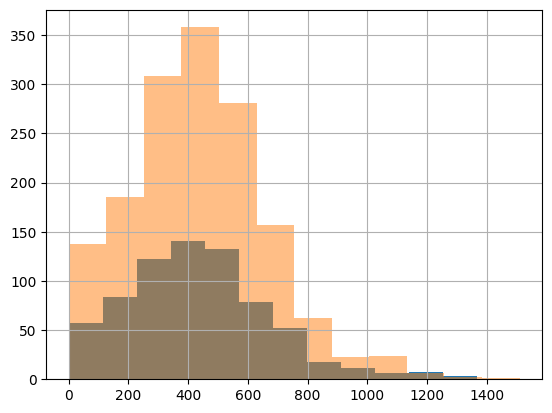

In [205]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf= df_plan[df_plan['plan_name']=='surf']
ultimate= df_plan[df_plan['plan_name']=='ultimate']
ultimate['sum_min'].hist(bins=12)
surf['sum_min'].hist(bins=12, alpha=0.5)

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [206]:
# Calcula la media y la varianza de la duración mensual de llamadas.

media= df_plan.groupby(['months', 'plan_name'])['sum_min'].mean()
variance= df_plan.groupby(['months', 'plan_name'])['sum_min'].var()
print(media)
print(variance)


months  plan_name
1       surf         203.000000
        ultimate     193.500000
2       surf         297.000000
        ultimate     470.333333
3       surf         330.000000
        ultimate     304.250000
4       surf         351.540000
        ultimate     336.857143
5       surf         410.240000
        ultimate     406.241379
6       surf         435.791667
        ultimate     387.444444
7       surf         453.733333
        ultimate     427.067797
8       surf         417.849057
        ultimate     421.436620
9       surf         420.732984
        ultimate     437.511628
10      surf         438.991379
        ultimate     455.028571
11      surf         432.494585
        ultimate     448.730159
12      surf         484.501608
        ultimate     465.261745
Name: sum_min, dtype: float64
months  plan_name
1       surf         15842.000000
        ultimate     16572.333333
2       surf         52226.500000
        ultimate     54345.066667
3       surf         35809.363

Hola, Voy a enviar mi primera parte, porque no puedo avanzar con los siguientes pasos, muchas gracias. Ya con su retroalimentacion, y ayuda, podré continuar para acabar el proyecto, gracias, bonito día.

<AxesSubplot:xlabel='sum_min'>

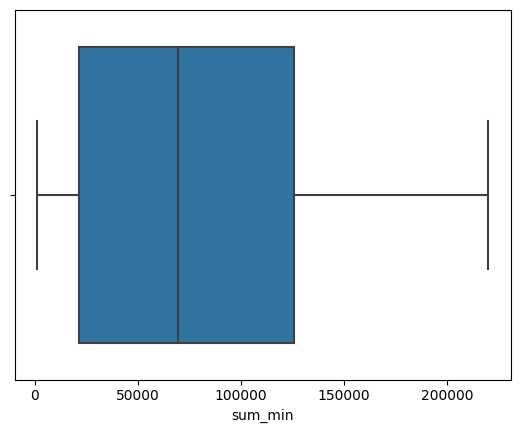

In [207]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

distribucion_min= df_plan.groupby('months')['sum_min'].sum()
sns.boxplot(distribucion_min)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Después de realizar estas gráficas, puedo sacar las siguientes conclusiones, las personas tienen distintos comportamientos respecto al plan que tienen, surf tiene más posibilidades para realizar más llamadas comparado con el plan ultimate.

### Mensajes

In [208]:
df_plan.groupby(['plan_name', 'months'])['user_id'].count()


plan_name  months
surf       1           2
           2           9
           3          23
           4          50
           5          77
           6          97
           7         121
           8         162
           9         194
           10        237
           11        283
           12        318
ultimate   1           4
           2           7
           3          12
           4          21
           5          29
           6          47
           7          59
           8          71
           9          86
           10        106
           11        127
           12        151
Name: user_id, dtype: int64

plan_name     surf  ultimate
months                      
1             21.0      62.0
2            108.0     151.0
3            351.0     243.0
4            870.0     463.0
5           1849.0     931.0
6           2454.0    1379.0
7           3271.0    1937.0
8           4662.0    2732.0
9           5968.0    3259.0
10          8020.0    4181.0
11          9165.0    4903.0
12         12275.0    6796.0


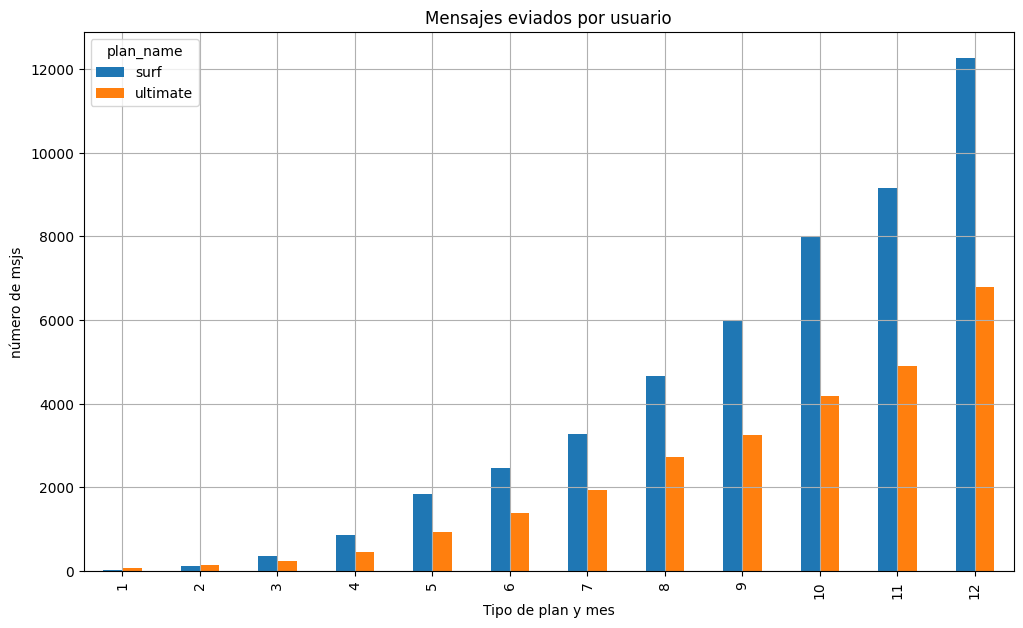

In [209]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

num_msj = df_plan.groupby(['months','plan_name'])['num_sms'].sum().unstack()

num_msj.plot(kind='bar', title='Mensajes eviados por usuario', xlabel='Tipo de plan y mes', ylabel='número de msjs', figsize=(12, 7), grid=True)

print(num_msj)

plan_name
surf        26223.0
ultimate    12461.0
Name: vol_num, dtype: float64


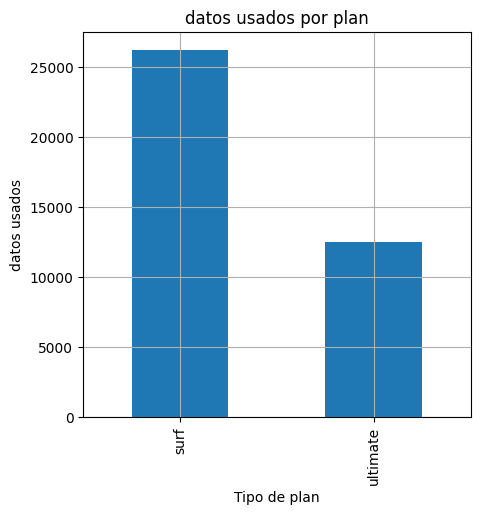

In [210]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

cantidad_dt = df_plan.groupby('plan_name')['vol_num'].sum()#.unstack()

cantidad_dt.plot(kind='bar', title='datos usados por plan', xlabel='Tipo de plan', ylabel='datos usados', figsize=(5, 5), grid=True)

print(cantidad_dt)

El plan de ultimate tiene mucho menos mensajes que surf, esto se debe a que ultimate tiene un limite de mensajes y datos inferior que los de surf. También noté que el número de mensjaes incrementa cada mes, ya que van viniendo más usuarios conforme pasa el año.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [211]:
internet= df_plan.groupby(['months', 'plan_name'])['vol_num'].sum().unstack()
internet

plan_name,surf,ultimate
months,,
1,10.0,29.0
2,110.0,121.0
3,312.0,221.0
4,611.0,343.0
5,1087.0,489.0
6,1502.0,725.0
7,2042.0,973.0
8,2735.0,1267.0
9,3238.0,1463.0


<AxesSubplot:xlabel='months'>

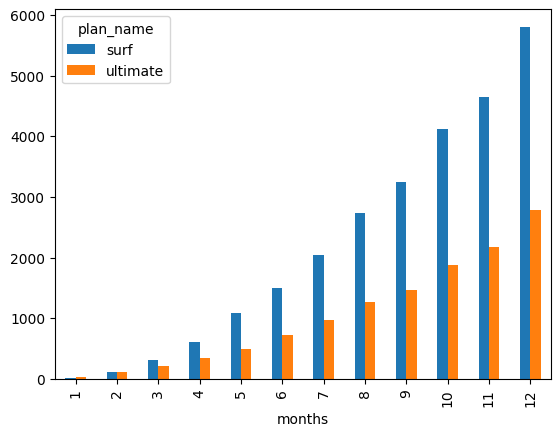

In [212]:
internet.plot(kind='bar')

In [213]:
#df_plan['vol_num'].head(12)

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Si varía de acuerdo a la función del plan, surf permite al usuario tener mas datos de internet gratis, sin costo extra, por lo que el número es más alto.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [214]:
#Ingresos totales de acuerdo al plan y al mes
ingreso= df_plan.groupby(['months','plan_name'])['ing_mensual'].sum()
print(ingreso)

months  plan_name
1       surf            40.00
        ultimate       280.00
2       surf           309.57
        ultimate       420.00
3       surf          1056.65
        ultimate       896.00
4       surf          2015.53
        ultimate      1533.00
5       surf          3607.34
        ultimate      2051.00
6       surf          4715.36
        ultimate      3227.00
7       surf          7519.93
        ultimate      4242.00
8       surf         10171.72
        ultimate      5173.00
9       surf         10891.07
        ultimate      6195.00
10      surf         14969.43
        ultimate      7595.00
11      surf         15776.63
        ultimate      9037.00
12      surf         21488.86
        ultimate     10885.00
Name: ing_mensual, dtype: float64


<AxesSubplot:xlabel='months'>

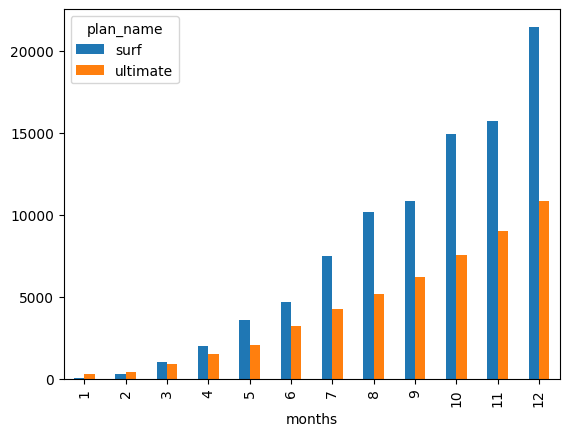

In [215]:
ingreso=ingreso.unstack()
ingreso.plot(kind='bar')

plan_name       surf   ultimate
months                         
1          20.000000  70.000000
2          34.396667  70.000000
3          45.941304  74.666667
4          41.133265  73.000000
5          48.747838  70.724138
6          50.163404  71.711111
7          63.192689  71.898305
8          65.203333  72.859155
9          57.321421  72.034884
10         65.368690  72.333333
11         57.369564  71.722222
12         69.318903  73.053691


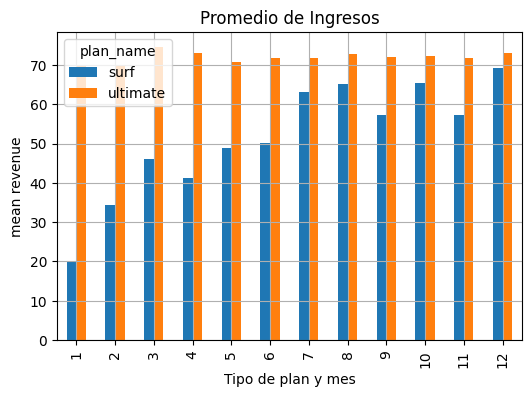

In [222]:
ing_promedio = df_plan.groupby(['months','plan_name'])['ing_mensual'].mean().unstack()

ing_promedio.plot(kind='bar', title='Promedio de Ingresos', xlabel='Tipo de plan y mes', ylabel='mean revenue', figsize=(6, 4), grid=True)

print(ing_promedio)

<AxesSubplot:xlabel='months'>

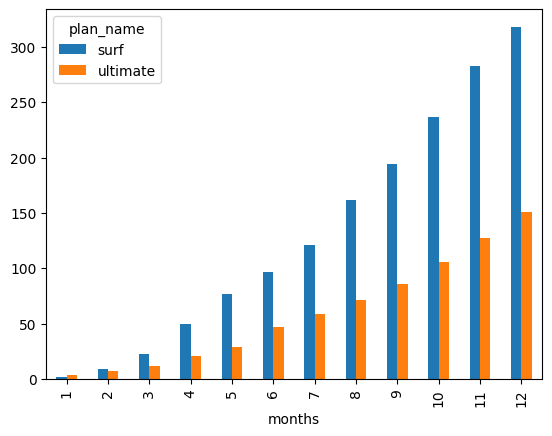

In [217]:
total_surf= df_plan.groupby(['months', 'plan_name']).size().unstack()
total_surf.plot(kind='bar')


<AxesSubplot:xlabel='plan_name'>

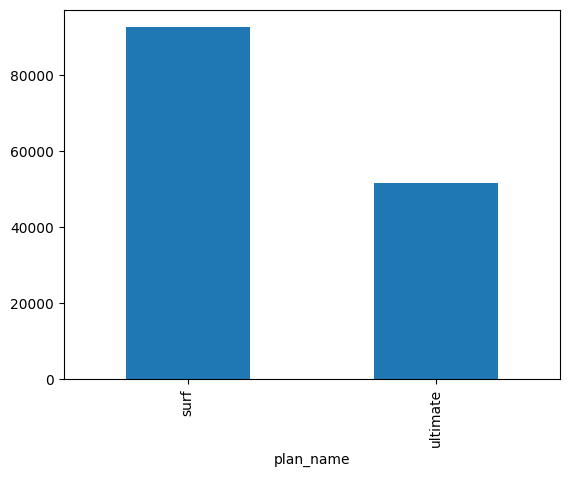

In [218]:

ingreso_total= df_plan.groupby('plan_name')['ing_mensual'].sum()
ingreso_total.plot(kind='bar')

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Podemos apreciar gracias a las gráficas que los ingresos totales de surf son mucho mayores a los del plan ultimate, agregando que sus precios son mucho más bajo, pero gracias a que sobrepasan la cantidad límite de algunas cosas, se les cobra extra por ello. Aunque el promedio de ultimate sean mayores que los de surf, no significa que ganen más ingresos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos, tanto para el consumo de minutos, mensajes e internet, como para los ingresos asociados a los cobros mensuales en cada plan. Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [219]:
# Prueba las hipótesis
#Hipótesis nula: SON IGUALES LOS INGRESOS PROMEDIOS DE ULTIMATE Y SURF
#Hipótesis alternativa: SON DIFERENTES LOS INGRESOS PROMEDIOS DE ULTIMATE Y SURF
surf_prom= df_plan[df_plan['plan_name']=='surf']
surf_prom=surf_prom['ing_mensual']
ult_prom= df_plan[df_plan['plan_name']=='ultimate']
ult_prom=ult_prom['ing_mensual']
#print(np.std(surf_prom))
#print(np.std(ult_prom))
alpha=0.05
prueba=st.ttest_ind(surf_prom, ult_prom, equal_var=False)
if prueba.pvalue < alpha:
    print('Rechazar la Hipótesis nula: Significa que los ingresos promedios son diferentes')
else:
    print('No podemos rechazar la hipótesis nula: los ingresos promedios son iguales')

No podemos rechazar la hipótesis nula: los ingresos promedios son iguales


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [245]:
# Prueba las hipótesis
#H0: Los ingresos promedio de los usuarios ny-nj son iguales a los de otras regiones
#Ha: Los ingresos promedio de los usuarios ny-nj son diferentes a los de otras regiones

ny= users[users['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
ny
otro= users[users['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']
ny
ny= ny[['user_id', 'plan']]
promedio= df_plan[['user_id', 'ing_mensual']]
ny= ny.merge(promedio, on='user_id', how='outer')
#sample_1
ny_ing= ny['ing_mensual']

otro= otro[['user_id', 'plan']]
promedio= df_plan[['user_id', 'ing_mensual']]
otro= otro.merge(promedio, on='user_id', how='outer')
#sample_2
otro_ing= otro['ing_mensual']
#Checar si la varianza es igual ( =True) o no (=False)
print(np.std(ny_ing))
print(np.std(otro_ing))

alpha= 0.05
prueba= st.ttest_ind(ny_ing, otro_ing, equal_var=True)
if prueba.pvalue < alpha:
    print('Rechazamos la hipótesis nula(los usuarios ny-nj son diferentes a los de otras regiones)')
else:
    print('No podemos rechazar la hipótesis nula.(los usuarios ny-nj son iguales a los de otras regiones)')

45.09906421007646
45.099064210076456
No podemos rechazar la hipótesis nula.(los usuarios ny-nj son iguales a los de otras regiones)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Sarah aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Este a sido un gran desafío, he aprendido mucho y obtenido varios descubrimientos, sobre los planes de télefono surf y ultimate. Entre mis conclusiones más importantes se encuentra:
1. Ultimate tiene mejor tarifa que surf.
2. Los usuarios que tiene el plan surf tienden a pagar más que ultimate, por lo que obtenemos más ganancias.
3. Hay más usuarios en surf que en ultimate
4. Pudimos obtener los ingresos mensuales por individuo, sumando costos extras, los cuales en casi la mayoria los usuarios en pagar costos extras son los de surf.
5. Fue muy interesante hacer hipótesis descubrimos que:
   1. No podemos rechazar la hipótesis nula donde dice que los ingresos promedios de ultimate y surf son iguales.
   2. No podemos rechazar la hipótesis nula, ya que la prueba muestra que los usuarios ny-nj son iguales a los de otras regiones.

<div 
class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda incluir una conclusión general de tu trabajo y dar respuesta a la pregunta inicial de este proyecto

```
"El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad"

```

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Lograste resumir los hallazgos clave del análisis de manera clara y concreta, mostrando una comprensión del comportamiento de los usuarios según el plan que eligen y el impacto económico que esto tiene para la empresa.

</div>